# Rice Leaf Disease using CNN

Of the three major crops – rice, wheat and maize – rice is by far the most important food crop for people in low- and lower-middle-income countries. Although rich and poor people alike eat rice in low-income countries, the poorest people consume relatively little wheat and are therefore deeply affected by the cost and availability of rice.

In many Asian countries, rice is the fundamental and generally irreplaceable staple, especially of the poor. For the extreme poor in Asia, who live on less than dollar 1.25 a day, rice accounts for nearly half of their food expenditures and a fifth of total household expenditures, on average. This group alone annually spends the equivalent of $62 billion (purchasing power parity) on rice. Rice is critical to food security for many of the world’s poor people.

This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

Classes

Leaf smut

Brown spot

Bacterial leaf blight

#  Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


In [2]:
import keras



# Set all the Constants

In [3]:
BATCH_SIZE = 10
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50




# Import data into tensorflow dataset object

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PRCP-1001-RiceLeaf/Data",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 123 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight-20200814T055237Z-001',
 'Brown spot-20200814T055208Z-001',
 'Leaf smut-20200814T055530Z-001']

In [6]:
len(dataset)

13

In [8]:
20*7

140

In [9]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())

(10, 256, 256, 3)
[2 1 0 2 0 0 2 2 2 2]


In [10]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch[1].shape)
  

(256, 256, 3)


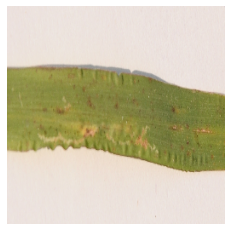

In [11]:
for image_batch, labels_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.axis('off')

# Visualize some of the images from our dataset

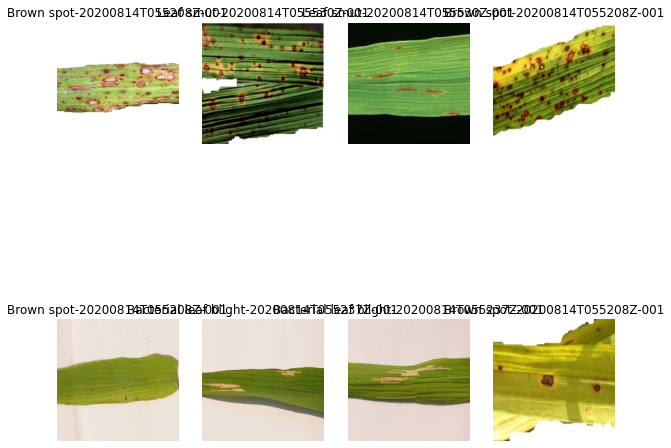

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# **Function to Split Dataset**
Dataset should be bifurcated into 3 subsets, namely:

1.Training: Dataset to be used while training

2.Validation: Dataset to be tested against while training

3.Test: Dataset to be tested against after we trained a model

In [15]:
train_size=0.7
len(dataset)*train_size

9.1

In [16]:
train_ds=dataset.take(2)
len(train_ds)

2

In [17]:
remain_ds= dataset.skip(2)
len(remain_ds)

11

In [18]:
val_size= 0.15
len(dataset)*val_size

1.95

In [19]:
val_ds = remain_ds.take(2)
len(val_ds)


2

In [20]:
test_ds= remain_ds.skip(1)
len(test_ds)

10

In [21]:
def get_data_set_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  
  return train_ds, val_ds, test_ds
  




In [22]:
train_ds, val_ds, test_ds = get_data_set_partitions_tf(dataset)

In [23]:
len(train_ds)

10

In [24]:
len(val_ds)

1

In [25]:
len(test_ds)

2

# **Cache, Shuffle, and Prefetch the Dataset**

In [26]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)


# **Building the Model**

In [27]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

# **Data Augmentation**

In [28]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])
    

# **Model Architecture**

# Using CNN

In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (10, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (10, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (10, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (10, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (10, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (10, 60, 60, 64)         

# **Compiling the Model**

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
10/10 [==============================] - 15s 2s/step - loss: 1.1151 - accuracy: 0.3548 - val_loss: 1.0981 - val_accuracy: 0.3000
Epoch 3/50
10/10 [==============================] - 17s 1s/step - loss: 1.0996 - accuracy: 0.3226 - val_loss: 1.0963 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 1.0972 - accuracy: 0.3548 - val_loss: 1.0884 - val_accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 12s 1s/step - loss: 1.0989 - accuracy: 0.3441 - val_loss: 1.0668 - val_accuracy: 0.6000
Epoch 6/50
10/10 [==============================] - 12s 1s/step - loss: 1.0411 - accuracy: 0.5269 - val_loss: 1.4550 - val_accuracy: 0.3000
Epoch 7/50
10/10 [==============================] - 14s 1s/step - loss: 1.1453 - accuracy: 0.3763 - val_loss: 0.9929 - val_accuracy: 0.7000
Epoch 8/50
10/10 [==============================] - 13s 1s/step - loss: 0.9944 - accuracy: 0.4839 - val_loss: 0.9671 - val_accuracy: 0.6000
Epoch 9/50
10/10 [==

In [33]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 5s 1s/step - loss: 0.5991 - accuracy: 0.9500


In [ ]:
scores

[0.2870926558971405, 0.949999988079071]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 10}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the Accuracy and Loss Curves

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

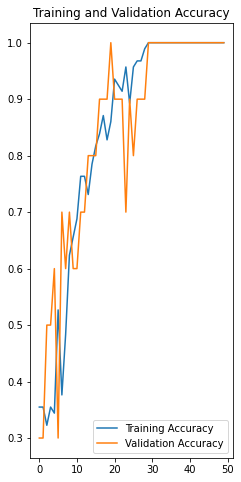

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')




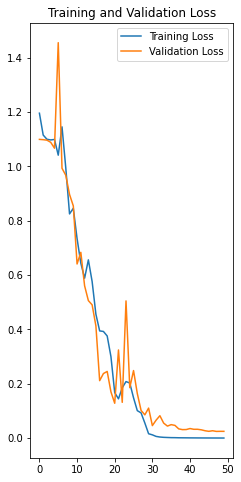

In [40]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Run prediction on a sample image**

first image to predict
actual label: Bacterial leaf blight-20200814T055237Z-001
1/1 [==============================] - 0s 453ms/step
predicted label: Bacterial leaf blight-20200814T055237Z-001


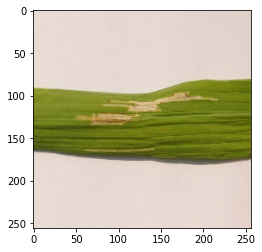

In [41]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# **Function for inference**

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 60ms/step


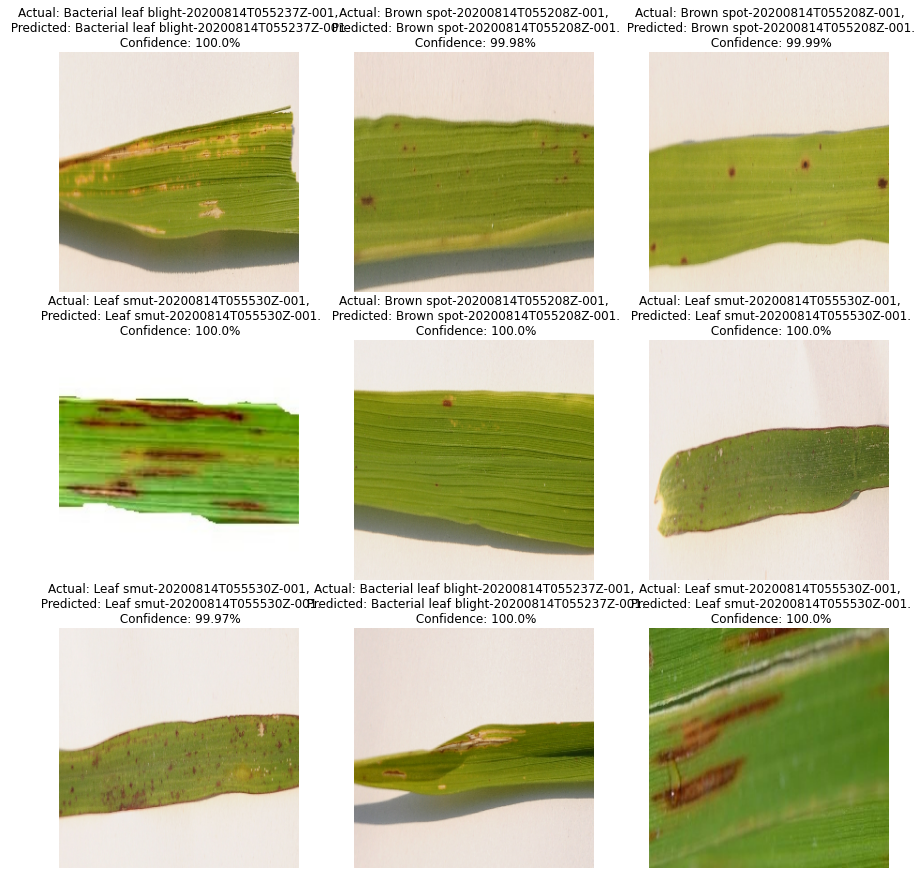

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# Conclusion


Use a different pre-trained model e.g. Densenet169 or Resnet18.

Use different image pre-processing methods.

Use a different augmentation setup or none at all.